[CV](https://www.cdc.gov/brfss/annual_data/2015/pdf/2015_Calculated_Variables_Version4_08_10_17-508c.pdf)
(all_feat)[https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf]

In [1]:
from functions.helpers import *
from functions.implementations import *
from functions.my_functions import *
import numpy as np
import pandas as pd

In [97]:
# Import df
df = pd.read_csv("data/dataset/x_train.csv")

# Feature Selection

In [98]:
# Select columns that we are going to use for the analysis

data_dict = {
    # "name of the var": ["synbol for nan", type of varibale]
    # if "nan" --> means to create a new class for missing values
    # if "no_missing" --> no need for NaN impuation
    # if "countousn" --> put mean
    # if "N" --> trnasg all NaN in that N
    "ACTIN11_": ["nan", "discrete"],
    "ACTIN21_": ["nan", "discrete"],
    "DROCDY3_": [900, "continous"],
    "FC60_": [99900, "continous"],
    "FRUTDA1_": ["nan", "continous"],
    "_FRTRESP": ["no_missing", "discrete"],
    "_FRUITEX": ["no_missing", "discrete"],
    "_FRUTSUM": ["nan", "continous"],
    "_HCVU651": [9, "discrete"],
    "_HISPANC": [9, "discrete"],
    "_INCOMG": [9, "discrete"],
    "_LMTACT1": [9, "discrete"],
    "_LMTSCL1": [9, "discrete"],
    "_LMTWRK1": [9, "discrete"],
    "_LTASTH1": [9, "discrete"],
    "_MINAC11": ["nan", "continous"],
    "_MINAC21": ["nan", "continous"],
    "_MISFRTN": ["no_missing", "discrete"],
    "_MISVEGN": ["no_missing", "discrete"],
    "_MRACE1": ["no_missing", "discrete"],
    "_PA30021": [9, "discrete"],
    "_PA150R2": [9, "discrete"],
    "_PA300R2": [9, "discrete"],
    "_PACAT1": [9, "discrete"],
    "_PAINDX1": [9, "discrete"],
    "_PAREC1": [9, "discrete"],
    "_PASTAE1": [9, "discrete"],
    "_PASTRNG": [9, "discrete"],
    "_PNEUMO2": [9, "discrete"],
    "_PRACE1": [99, "discrete"],
    "_RACE": [9, "discrete"],
    "_RACEG21": [9, "discrete"],
    "_RACEGR3": [9, "discrete"],
    "_RACE_G1": ["nan", "discrete"],
    "_RFBING5": [9, "discrete"],
    "_RFBMI5": [9, "discrete"],
    "_RFCHOL": [9, "discrete"],
    "_RFDRHV5": [9, "discrete"],
    "_RFHLTH": [9, "discrete"],
    "_RFHYPE5": [9, "discrete"],
    "_RFSEAT2": [9, "discrete"],
    "_RFSEAT3": [9, "discrete"],
    "_RFSMOK3": [9, "discrete"],
    "_SMOKER3": [9, "discrete"],
    "_TOTINDA": [9, "discrete"],
    "_VEG23": [0, "discrete"],
    "_VEGESUM": ["nan", "continous"],
    "_VEGETEX": [1, "discrete"],
    "_VEGLT1": [9, "discrete"],
    "GRENDAY_": ["nan", "continous"],
    "MAXVO2_": [99900, "continous"],
    "METVL11_": ["nan", "continous"],
    "METVL21_": ["nan", "continous"],
    "ORNGDAY_": ["nan", "continous"],
    "PA1MIN_": ["nan", "continous"],
    "PA1VIGM_": ["nan", "continous"],
    "PADUR1_": ["nan", "continous"],
    "PADUR2_": ["nan", "continous"],
    "PAFREQ1_": [99000, "continous"],
    "PAFREQ2_": [99000, "continous"],
    "PAMIN11_": ["nan", "continous"],
    "PAMIN21_": ["nan", "continous"],
    "PAMISS1_": [9, "discrete"],
    "PAVIG11_": ["nan", "continous"],
    "PAVIG21_": ["nan", "continous"],
    "VEGEDA1_": ["nan", "continous"],
    "_AGE80": ["nan", "continous"],
    "_AIDTST3": [9, "discrete"],
    "_ASTHMS1": [9, "discrete"],
    "_BMI5": ["nan", "continous"],
    "_CASTHM1": [9, "discrete"],
    "_CHLDCNT": [9, "discrete"],
    "_CHOLCHK": [9, "discrete"],
    "_DRDXAR1": ["nan", "discrete"],
    "_DRNKWEK": [99900, "continous"],
    "_EDUCAG": [9, "discrete"],
    "_FLSHOT6": [9, "discrete"],
    "_FRT16": [0, "discrete"],
    "_FRTLT1": [9, "discrete"]
}

"""
VC calculated but not used because
    - not present in out dataset: '_MICHD', '_VEGRESPFTJUDA1_', 'PAINACT2'
    - make no sense: 
        "_LLCPWT" "_DUALCOR" "_DUALUSE" --> HIDDEN or cell phone
        ("_AGE65YR" "_AGEG5YR" _AGE_G--> alredy rpesent in AGE80) 
        "_BMI5CAT" --> altry in _BMI
"""

# TODO: Maybe add other cols that could be useful
other_useful_cols = np.array(["Id"])

# Columns to select
useful_cols = np.concatenate([other_useful_cols, list(data_dict.keys())])

# Select usduful cols
df_filtered = df[useful_cols].copy()
print(len(df_filtered.columns))

df_filtered

80


,Id,ACTIN11_,ACTIN21_,DROCDY3_,FC60_,FRUTDA1_,_FRTRESP,_FRUITEX,_FRUTSUM,_HCVU651,...,_BMI5,_CASTHM1,_CHLDCNT,_CHOLCHK,_DRDXAR1,_DRNKWEK,_EDUCAG,_FLSHOT6,_FRT16,_FRTLT1
0,0,1.0,1.0,0,4.61,0.71,1,0,0.71,1,...,20.78,1,1,1,2.0,0,3,NaN,1,2
1,1,NaN,NaN,100,4.91,NaN,0,1,NaN,1,...,28.70,1,1,1,2.0,99900,2,NaN,1,9
2,2,1.0,0.0,13,4.11,2.00,1,0,2.03,9,...,NaN,1,1,1,1.0,93,4,1.0,1,1
3,3,2.0,2.0,0,4.11,0.00,1,0,0.00,9,...,27.96,1,1,2,1.0,0,2,2.0,1,2
4,4,NaN,NaN,900,999.00,0.50,1,0,1.50,9,...,24.39,1,1,1,2.0,99900,9,9.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,328130,1.0,1.0,71,4.91,1.00,1,0,1.00,1,...,24.69,1,1,1,2.0,1000,4,NaN,1,1
328131,328131,2.0,2.0,0,5.10,1.00,1,0,1.00,1,...,24.39,1,1,9,2.0,0,3,NaN,1,1
328132,328132,1.0,0.0,0,3.92,1.00,1,0,1.00,9,...,58.53,1,1,1,2.0,0,3,2.0,1,1
328133,328133,2.0,0.0,0,6.23,0.07,1,0,0.07,1,...,35.87,2,1,1,2.0,0,2,NaN,1,2


In [99]:
# REMOVE COLS WITH TOO MANY NAN

thr_nan = 0.75

# Calculate the threshold for NaN values
threshold = thr_nan * len(df_filtered)

# Identify columns to drop
cols_to_drop = df_filtered.columns[df_filtered.isna().sum() > threshold]

# Print the names of the columns that will be dropped
print("Columns to be dropped:", cols_to_drop.tolist())

# Drop the columns
df_filtered.drop(columns=cols_to_drop, inplace=True)
df_filtered

Columns to be dropped: []


,Id,ACTIN11_,ACTIN21_,DROCDY3_,FC60_,FRUTDA1_,_FRTRESP,_FRUITEX,_FRUTSUM,_HCVU651,...,_BMI5,_CASTHM1,_CHLDCNT,_CHOLCHK,_DRDXAR1,_DRNKWEK,_EDUCAG,_FLSHOT6,_FRT16,_FRTLT1
0,0,1.0,1.0,0,4.61,0.71,1,0,0.71,1,...,20.78,1,1,1,2.0,0,3,NaN,1,2
1,1,NaN,NaN,100,4.91,NaN,0,1,NaN,1,...,28.70,1,1,1,2.0,99900,2,NaN,1,9
2,2,1.0,0.0,13,4.11,2.00,1,0,2.03,9,...,NaN,1,1,1,1.0,93,4,1.0,1,1
3,3,2.0,2.0,0,4.11,0.00,1,0,0.00,9,...,27.96,1,1,2,1.0,0,2,2.0,1,2
4,4,NaN,NaN,900,999.00,0.50,1,0,1.50,9,...,24.39,1,1,1,2.0,99900,9,9.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,328130,1.0,1.0,71,4.91,1.00,1,0,1.00,1,...,24.69,1,1,1,2.0,1000,4,NaN,1,1
328131,328131,2.0,2.0,0,5.10,1.00,1,0,1.00,1,...,24.39,1,1,9,2.0,0,3,NaN,1,1
328132,328132,1.0,0.0,0,3.92,1.00,1,0,1.00,9,...,58.53,1,1,1,2.0,0,3,2.0,1,1
328133,328133,2.0,0.0,0,6.23,0.07,1,0,0.07,1,...,35.87,2,1,1,2.0,0,2,NaN,1,2


In [23]:
# REMOVE PATIENTS WITH TOO MANY NaN

# NO !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Impute missing Values

In [100]:
# IMPUTE MISSING VALUES

for col_name in df_filtered.columns:
    try:
        col = data_dict[col_name]
    except KeyError:
        print(f"Column {col_name} not in the dict.")
        continue  # Skip to the next iteration if the column is not found

    type_feature = col[1]
    nan_symbol = col[0]

    #print(f"{col_name} {type_feature} {nan_symbol}")

    if type_feature == "continous":
        # Replace NaN values with the mean of the feature
            # but the mean shpodun not be calculayed using the NaN-symols, otherwise the men will be skewed
        df_filtered[col_name] = df_filtered[col_name].replace(nan_symbol, None)  # Replace NaN symbols with Mean
            # in these way "9999" will not be used for clauclatignthe means
        mean_value = df_filtered[col_name].mean() # ATTENTION TO NOT OCUNT NAN
        df_filtered[col_name] = df_filtered[col_name].fillna(mean_value)  # Replace NaN with Mean
        
    elif type_feature == "discrete":
        # Handle NaN values for discrete features
        if nan_symbol == "nan":  # No predefined category for missing
            df_filtered[col_name] = df_filtered[col_name].fillna(-1)  # Replace with -1 for missing
        else:
            df_filtered[col_name] = df_filtered[col_name].fillna(nan_symbol)  # Replace NaN with predefined missing value

display(df_filtered)

#Check for Nan Values
print(df_filtered.columns[df_filtered.isna().any()].tolist())

Column Id not in the dict.


/tmp/ipykernel_86161/2114852876.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered[col_name] = df_filtered[col_name].fillna(mean_value)  # Replace NaN with Mean


,Id,ACTIN11_,ACTIN21_,DROCDY3_,FC60_,FRUTDA1_,_FRTRESP,_FRUITEX,_FRUTSUM,_HCVU651,...,_BMI5,_CASTHM1,_CHLDCNT,_CHOLCHK,_DRDXAR1,_DRNKWEK,_EDUCAG,_FLSHOT6,_FRT16,_FRTLT1
0,0,1.0,1.0,0.000000,4.61,0.710000,1,0,0.710000,1,...,20.780000,1,1,1,2.0,0.000000,3,9.0,1,2
1,1,-1.0,-1.0,100.000000,4.91,1.004961,0,1,1.361799,1,...,28.700000,1,1,1,2.0,262.715064,2,9.0,1,9
2,2,1.0,0.0,13.000000,4.11,2.000000,1,0,2.030000,9,...,28.033007,1,1,1,1.0,93.000000,4,1.0,1,1
3,3,2.0,2.0,0.000000,4.11,0.000000,1,0,0.000000,9,...,27.960000,1,1,2,1.0,0.000000,2,2.0,1,2
4,4,-1.0,-1.0,16.102383,999.00,0.500000,1,0,1.500000,9,...,24.390000,1,1,1,2.0,262.715064,9,9.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,328130,1.0,1.0,71.000000,4.91,1.000000,1,0,1.000000,1,...,24.690000,1,1,1,2.0,1000.000000,4,9.0,1,1
328131,328131,2.0,2.0,0.000000,5.10,1.000000,1,0,1.000000,1,...,24.390000,1,1,9,2.0,0.000000,3,9.0,1,1
328132,328132,1.0,0.0,0.000000,3.92,1.000000,1,0,1.000000,9,...,58.530000,1,1,1,2.0,0.000000,3,2.0,1,1
328133,328133,2.0,0.0,0.000000,6.23,0.070000,1,0,0.070000,1,...,35.870000,2,1,1,2.0,0.000000,2,9.0,1,2


[]


# Correlation
Before encoding check if some cols are correlated.
Maybe remove the ones highly correlated.

In [ ]:
# CORRELATION

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_filtered.corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Show the plot
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_filtered.corr()

# Create a mask for correlations greater than 0.6
mask = (correlation_matrix.abs() > 0.9) & (correlation_matrix != 1)

# Get the pairs of columns with high correlation
high_corr_pairs = []

for row in correlation_matrix.index:
    for col in correlation_matrix.columns:
        if mask.loc[row, col]:
            high_corr_pairs.append((row, col, correlation_matrix.loc[row, col]))

# Print the pairs
for pair in high_corr_pairs:
    print(f"Columns: {pair[0]} and {pair[1]} - Correlation: {pair[2]:.2f}")

# Encode Discrete Variables
Chose one hot encode

In [102]:
# ENCODING OF DISCRETE VARIABLES

# Extracting keys where the value indicates "discrete"
discrete_keys = [key for key, value in data_dict.items() if value[1] == "discrete"]
print(discrete_keys)
#df_filtered = 
df_filtered = pd.get_dummies(df_filtered, columns=discrete_keys, drop_first=True)
    #ATTENTION DROP FISRT
print(len(df_filtered.columns))

['ACTIN11_', 'ACTIN21_', '_FRTRESP', '_FRUITEX', '_HCVU651', '_HISPANC', '_INCOMG', '_LMTACT1', '_LMTSCL1', '_LMTWRK1', '_LTASTH1', '_MISFRTN', '_MISVEGN', '_MRACE1', '_PA30021', '_PA150R2', '_PA300R2', '_PACAT1', '_PAINDX1', '_PAREC1', '_PASTAE1', '_PASTRNG', '_PNEUMO2', '_PRACE1', '_RACE', '_RACEG21', '_RACEGR3', '_RACE_G1', '_RFBING5', '_RFBMI5', '_RFCHOL', '_RFDRHV5', '_RFHLTH', '_RFHYPE5', '_RFSEAT2', '_RFSEAT3', '_RFSMOK3', '_SMOKER3', '_TOTINDA', '_VEG23', '_VEGETEX', '_VEGLT1', 'PAMISS1_', '_AIDTST3', '_ASTHMS1', '_CASTHM1', '_CHLDCNT', '_CHOLCHK', '_DRDXAR1', '_EDUCAG', '_FLSHOT6', '_FRT16', '_FRTLT1']
182


# Normalize Countinous Variables

ATTENTION:
- test and train must be normlized separated (aboid info leckage)
- normalization happens along feautures, i.e. each column

In [101]:
# NORMALIZATION OF CONTINOUS VARIABLES

continuous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]
normalization = "minmax" #minmax, z-score, nothing, robust_scalar

print("values before normalization:\n")
display(df_filtered[continuous_keys])

# Normalization Techniques
# 1. Min-Max Scaling
if normalization == "minmax":
    for key in continuous_keys:
        column = df_filtered[key]
        mean_value = np.nanmean(column)  # Calculate mean ignoring NaNs
        column[np.isnan(column)] = mean_value  # Replace NaNs with mean

        # Min-Max Normalization
        min_value = np.min(column)
        max_value = np.max(column)
        column = (column - min_value) / (max_value - min_value)
        
        # Update the column in df_filtered
        df_filtered[key] = column

# 2. Z-score
if False:
    for key in continuous_keys:
        column = df_filtered[key]
        mean_value = np.nanmean(column)
        std_value = np.nanstd(column)  # Standard deviation ignoring NaNs
        column[np.isnan(column)] = mean_value  # Fill NaNs with mean
        column = (column - mean_value) / std_value
        df_filtered[key] = column

# 3. Robust Scalar
if False:
    for key in continuous_keys:
        column = df_filtered[key]
        median_value = np.nanmedian(column)
        q1 = np.nanpercentile(column, 25)  # 25th percentile
        q3 = np.nanpercentile(column, 75)  # 75th percentile
        iqr = q3 - q1  # Interquartile range
        column[np.isnan(column)] = median_value  # Fill NaNs with median
        column = (column - median_value) / iqr
        df_filtered[key] = column

df_filtered

values before normalization:



,DROCDY3_,FC60_,FRUTDA1_,_FRUTSUM,_MINAC11,_MINAC21,_VEGESUM,GRENDAY_,MAXVO2_,METVL11_,...,PAFREQ1_,PAFREQ2_,PAMIN11_,PAMIN21_,PAVIG11_,PAVIG21_,VEGEDA1_,_AGE80,_BMI5,_DRNKWEK
0,0.000000,4.61,0.710000,0.710000,60.000000,140.000000,1.210000,0.100000,26.91,3.500000,...,2.000000,4.667000,60.000000,140.000000,0.00000,0.000000,0.710000,57,20.780000,0.000000
1,100.000000,4.91,1.004961,1.361799,229.539738,129.760626,1.949433,0.567969,28.65,4.170547,...,4.027582,3.128048,313.132584,181.398664,82.10056,51.004438,0.802999,57,28.700000,262.715064
2,13.000000,4.11,2.000000,2.030000,90.000000,0.000000,2.860000,1.000000,23.95,3.500000,...,3.000000,3.128048,90.000000,0.000000,0.00000,0.000000,1.000000,65,28.033007,93.000000
3,0.000000,4.11,0.000000,0.000000,600.000000,180.000000,2.780000,1.000000,23.95,4.500000,...,5.000000,1.000000,1200.000000,360.000000,600.00000,180.000000,1.000000,65,27.960000,0.000000
4,16.102383,999.00,0.500000,1.500000,280.000000,129.760626,1.730000,0.130000,999.00,3.500000,...,4.667000,3.128048,313.132584,181.398664,82.10056,51.004438,0.830000,61,24.390000,262.715064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,71.000000,4.91,1.000000,1.000000,75.000000,120.000000,1.890000,0.330000,28.65,3.500000,...,3.000000,1.000000,75.000000,120.000000,0.00000,0.000000,1.000000,57,24.690000,1000.000000
328131,0.000000,5.10,1.000000,1.000000,450.000000,21.000000,2.340000,1.000000,29.75,6.800000,...,5.000000,0.467000,900.000000,42.000000,450.00000,21.000000,0.200000,55,24.390000,0.000000
328132,0.000000,3.92,1.000000,1.000000,120.000000,0.000000,0.780000,0.070000,22.84,3.500000,...,4.000000,3.128048,120.000000,0.000000,0.00000,0.000000,0.570000,68,58.530000,0.000000
328133,0.000000,6.23,0.070000,0.070000,14.000000,0.000000,0.360000,0.170000,36.35,7.300000,...,0.467000,3.128048,28.000000,0.000000,14.00000,0.000000,0.130000,43,35.870000,0.000000


/tmp/ipykernel_86161/336054439.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[np.isnan(column)] = mean_value  # Replace NaNs with mean
/tmp/ipykernel_86161/336054439.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[np.isnan(column)] = mean_value  # Replace NaNs with mean
/tmp/ipykernel_86161/336054439.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[np.isnan(column)] = mean_value  # Replace NaNs with 

,Id,ACTIN11_,ACTIN21_,DROCDY3_,FC60_,FRUTDA1_,_FRTRESP,_FRUITEX,_FRUTSUM,_HCVU651,...,_BMI5,_CASTHM1,_CHLDCNT,_CHOLCHK,_DRDXAR1,_DRNKWEK,_EDUCAG,_FLSHOT6,_FRT16,_FRTLT1
0,0,1.0,1.0,0.000000,0.003667,0.007172,1,0,0.004733,1,...,0.102301,1,1,1,2.0,0.000000,3,9.0,1,2
1,1,-1.0,-1.0,1.000000,0.003968,0.010151,0,1,0.009079,1,...,0.194792,1,1,1,2.0,0.004938,2,9.0,1,9
2,2,1.0,0.0,0.130000,0.003166,0.020202,1,0,0.013533,9,...,0.187002,1,1,1,1.0,0.001748,4,1.0,1,1
3,3,2.0,2.0,0.000000,0.003166,0.000000,1,0,0.000000,9,...,0.186150,1,1,2,1.0,0.000000,2,2.0,1,2
4,4,-1.0,-1.0,0.161024,1.000000,0.005051,1,0,0.010000,9,...,0.144459,1,1,1,2.0,0.004938,9,9.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,328130,1.0,1.0,0.710000,0.003968,0.010101,1,0,0.006667,1,...,0.147962,1,1,1,2.0,0.018797,4,9.0,1,1
328131,328131,2.0,2.0,0.000000,0.004158,0.010101,1,0,0.006667,1,...,0.144459,1,1,9,2.0,0.000000,3,9.0,1,1
328132,328132,1.0,0.0,0.000000,0.002976,0.010101,1,0,0.006667,9,...,0.543151,1,1,1,2.0,0.000000,3,2.0,1,1
328133,328133,2.0,0.0,0.000000,0.005290,0.000707,1,0,0.000467,1,...,0.278524,2,1,1,2.0,0.000000,2,9.0,1,2


# Feature engeneering
    - PCA
    - combinaing features ex. polynomial

In [2]:
x_train,x_test,y_train,train_ids,test_ids = load_csv_data("data/dataset", sub_sample=True)


In [6]:
print(x_train[:5])
print(y_train)

[[5.3000000e+01 1.1000000e+01 1.1162015e+07 ...           nan
            nan 2.0000000e+00]
 [4.5000000e+01 7.0000000e+00 7.1620150e+06 ...           nan
            nan 2.0000000e+00]
 [4.0000000e+00 2.0000000e+00 2.2520150e+06 ...           nan
            nan 2.0000000e+00]
 [8.0000000e+00 4.0000000e+00 6.0120150e+06 ...           nan
            nan 1.0000000e+00]
 [2.9000000e+01 2.0000000e+00 2.1720150e+06 ...           nan
            nan 2.0000000e+00]]
[-1 -1 -1 ...  1 -1 -1]


In [103]:
d = df_filtered

d = d.drop("Id", axis=1)
print(d.dtypes.unique())

# Convert boolean columns to integers
for col in d.select_dtypes(include=['bool']).columns:
    d[col] = d[col].astype(int)


use = 0

if use == 0:
    # Use all varibales
    x_train = d.to_numpy()
if use == 1:
    # Only use continuos variables
    continuous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]
    d = d[continuous_keys]
    x_train = d.to_numpy()
if use == 2:
    # Only use BMI and AGE80
    d = d[["_AGE80", "_BMI5"]]
    x_train = d.to_numpy()
if use == 3:
    # Only use continuos variables
    continuous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]
    d = d[continuous_keys]
    x_train = d.to_numpy()
    x_train = pca(x_train, variance_threshold=0.9)
if use == 4:
    # Incre the number of continous feaures using polinormilas
    continuous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]
    d = d[continuous_keys]
    x_train = d.to_numpy()
    x_train = build_poly(x_train, degree=3)
if use == 5:
    # Use only continuos with pca
    continuous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]
    d = d[continuous_keys]
    x_train = d.to_numpy()
    x_train = pca(x_train, variance_threshold=0.8)
if use == 6:
    #only continous with costant term
    continuous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]
    d = d[continuous_keys]
    x_train = d.to_numpy()
    x_train = np.c_[np.ones((x_train.shape[0], 1)), x_train]



print(y_train.dtype)
print(x_train.dtype)
display(x_train)
print(x_train.shape)

[dtype('float64') dtype('bool')]
int64
float64


array([[0.00000000e+00, 3.66715094e-03, 7.17171717e-03, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.96773709e-03, 1.01511245e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.30000000e-01, 3.16617404e-03, 2.02020202e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.97580282e-03, 1.01010101e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.29031612e-03, 7.07070707e-04, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.04789339e-03, 3.03030303e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

(328135, 181)


# Cross Validation

In [78]:
def stratified_k_fold_cross_validation(y, tx, k_folds, max_iters, gamma, lambda_ridge, optimization_method, seed=42):
    """Performs Stratified K-Fold Cross-Validation for gradient descent model training using numpy.

    Args:
        y (np.array): Labels (target values), shape=(N,)
        tx (np.array): Input data, shape=(N, D)
        k_folds (int): Number of folds (k) for cross-validation
        max_iters (int): Number of iterations for gradient descent
        gamma (float): Learning rate for gradient descent

    Returns:
        dict: Cross-validation metrics for each fold for both training and validation sets
    """
    # Set random seed for reproducibility
    np.random.seed(seed)

    # Shuffle the data
    indices = np.arange(len(y))
    np.random.shuffle(indices)
    y, tx = y[indices], tx[indices]

    # Group indices by class
    #finds the indices corresponding to that class and stores them in the class_indices dictionary
    class_indices = {}
    for class_label in np.unique(y):
        class_indices[class_label] = np.where(y == class_label)[0]

    # Create k folds
    # Each sublist will eventually hold the indices for a fold.
    folds = [[] for _ in range(k_folds)]

    for class_label, indices in class_indices.items():
        np.random.shuffle(indices)  # Shuffle indices for the current class
        fold_sizes = [len(indices) // k_folds] * k_folds # number of samples per fold
        for i in range(len(indices) % k_folds):  #those remaining samples are distributed across the first few folds.
            fold_sizes[i] += 1  # Distribute remaining samples

        current_index = 0
        #r, indices are assigned to each fold in order, ensuring that the samples from each class are distributed proportionally.
        for fold_index in range(k_folds):
            folds[fold_index].extend(indices[current_index:current_index + fold_sizes[fold_index]])
            current_index += fold_sizes[fold_index]

    # Train and validate
    fold_metrics = []  # Store metrics for both training and validation sets
    best_w = None  # Best model (i.e. the parameters that compose it)
    best_accuracy = 0  # Track the best accuracy
    best_f1_score = 0

    for fold in range(k_folds):
        # The current fold is the validation set
        val_indices = folds[fold] 
        # The training set is constructed by concatenating all indices from the other folds
        train_indices = np.concatenate([folds[i] for i in range(k_folds) if i != fold])

        # Split the dataset into training and validation sets for this fold
        x_train_fold, x_val_fold = tx[train_indices], tx[val_indices]
        y_train_fold, y_val_fold = y[train_indices], y[val_indices]

        # Initialize weights (can also be random)
        initial_w = np.zeros(x_train_fold.shape[1])

        # Train the model using mean_squared_error_gd
        if optimization_method == "mse_gd":
            w, train_loss = mean_squared_error_gd(y_train_fold, x_train_fold, initial_w, max_iters, gamma)
        elif optimization_method == "ridge":
            w, train_loss = ridge_regression(y_train_fold, x_train_fold, lambda_=lambda_ridge)
        elif optimization_method == "least_squares":
            w, train_loss = least_squares(y_train_fold, x_train_fold)

        # Compute prediction for train and test set
        val_predictions = np.sign(np.dot(x_val_fold, w)) # ATTENTION: +1, -1
        train_predictions = np.sign(np.dot(x_train_fold, w))

        # Compute training loss (MSE) --> calculated before
        # Compute validation loss (MSE)
        val_error = y_val_fold - np.dot(x_val_fold, w)  # Validation error = true_label - predictions
        val_loss = calculate_mse(val_error)  # MSE on validation set

        # Calculate accuracy on validation set and training set
        val_accuracy = np.mean(val_predictions == y_val_fold)
        train_accuracy = np.mean(train_predictions == y_train_fold)

        # Calculate F1 score on validation set and  training set
        val_f1_score = compute_f1_score(y_val_fold, val_predictions)
        train_f1_score = compute_f1_score(y_train_fold, train_predictions)

        # Append metrics for this fold
        fold_metrics.append({
            'fold': fold + 1,
            'val_loss': val_loss,
            'val_accuracy': val_accuracy,
            'val_f1_score': val_f1_score,
            'train_loss': train_loss,
            'train_accuracy': train_accuracy,
            'train_f1_score': train_f1_score
        })

        # Print fold metrics
        print(f"Fold {fold + 1}/{k_folds}: Validation Loss={val_loss}, Accuracy={val_accuracy}, F1={val_f1_score}")
        print(f"Fold {fold + 1}/{k_folds}: Training Loss={train_loss}, Accuracy={train_accuracy}, F1={train_f1_score}")
        print("\n")

        # Update best model if current validation accuracy is better
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_f1_score = val_f1_score
            best_w = w
    
    # Calculate means across folds
    mean_val_accuracy = np.mean([metrics['val_accuracy'] for metrics in fold_metrics])
    mean_val_f1_score = np.mean([metrics['val_f1_score'] for metrics in fold_metrics])
    mean_train_accuracy = np.mean([metrics['train_accuracy'] for metrics in fold_metrics])
    mean_train_f1_score = np.mean([metrics['train_f1_score'] for metrics in fold_metrics])


    return fold_metrics, best_w, best_accuracy, best_f1_score, mean_val_accuracy, mean_val_f1_score, mean_train_accuracy, mean_train_f1_score


In [104]:
# Hyperparameters
max_iters = 10 # Number of iterations for gradient descent
gamma = 0.1  # Learning rate
k_folds = 10  # Number of folds for cross-validation
lambda_ridge = 0.1
optimization_method = "mse_gd" #mse_gd, msg_sgd, least_squares, ridge

# Run cross-validation
fold_metrics, best_w, best_accuracy, best_f1_score, mean_val_accuracy, mean_val_f1_score, mean_train_accuracy, mean_train_f1_score = stratified_k_fold_cross_validation(
    y = y_train, 
    tx = x_train, 
    k_folds = k_folds, 
    max_iters = max_iters, 
    gamma = gamma, 
    lambda_ridge = lambda_ridge, 
    optimization_method = optimization_method
    )


print(best_accuracy)
print(best_f1_score)
print(best_w)

GD iter. 1/10: loss=0.5, w0=-0.013610765780801993, w1=-0.0013534241050319094
GD iter. 2/10: loss=0.2118826929432724, w0=-0.008432744826051324, w1=-0.0008347294497371775
GD iter. 3/10: loss=0.16759438688735348, w0=-0.01055479930906077, w1=-0.001027655915919368
GD iter. 4/10: loss=0.1604773202457073, w0=-0.009809399101119469, w1=-0.0009284297880922227
GD iter. 5/10: loss=0.15909164507881834, w0=-0.010163100794342347, w1=-0.0009312023523771742
GD iter. 6/10: loss=0.1586370246436581, w0=-0.010071846873567257, w1=-0.0008846017748446646
GD iter. 7/10: loss=0.1583682712112955, w0=-0.010139550057332932, w1=-0.000849493988252868
GD iter. 8/10: loss=0.15816095807818872, w0=-0.010132444093963936, w1=-0.0008036530182007906
GD iter. 9/10: loss=0.15798812412378113, w0=-0.010143091298501558, w1=-0.0007569633226375899
GD iter. 10/10: loss=0.15783982607833344, w0=-0.010136632391065341, w1=-0.000706562398667649
Fold 1/10: Validation Loss=0.1629379525235509, Accuracy=0.9133738601823708, F1=0
Fold 1/10: T

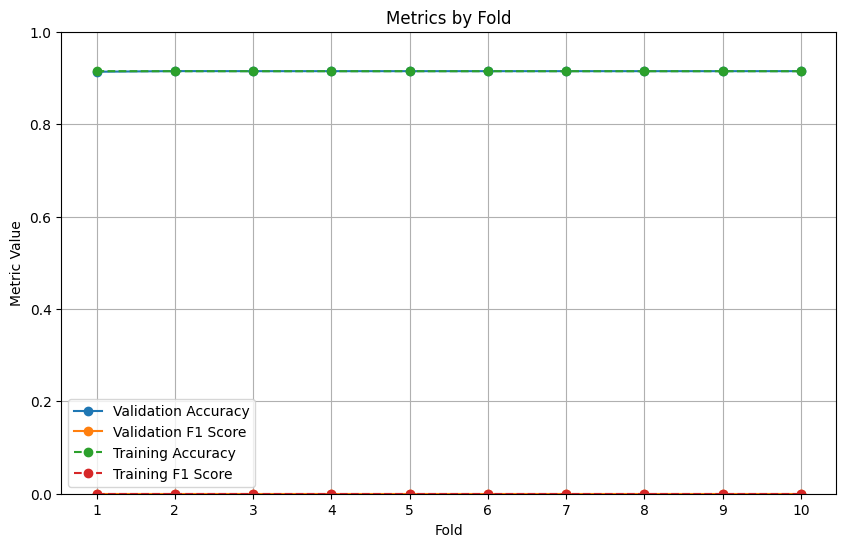

In [67]:
"""Plot the accuracy and F1 score for each fold."""
folds = [metrics['fold'] for metrics in fold_metrics]
val_accuracies = [metrics['val_accuracy'] for metrics in fold_metrics]
val_f1_scores = [metrics['val_f1_score'] for metrics in fold_metrics]
train_accuracies = [metrics['train_accuracy'] for metrics in fold_metrics]
train_f1_scores = [metrics['train_f1_score'] for metrics in fold_metrics]

plt.figure(figsize=(10, 6))

# Plot Validation Accuracy and F1 Score
plt.plot(folds, val_accuracies, label='Validation Accuracy', marker='o', linestyle='-')
plt.plot(folds, val_f1_scores, label='Validation F1 Score', marker='o', linestyle='-')
plt.plot(folds, train_accuracies, label='Training Accuracy', marker='o', linestyle='--')
plt.plot(folds, train_f1_scores, label='Training F1 Score', marker='o', linestyle='--')

plt.title('Metrics by Fold')
plt.xlabel('Fold')
plt.ylabel('Metric Value')
plt.xticks(folds)
plt.ylim(0, 1)  # Assuming accuracy and F1 scores are between 0 and 1
plt.legend()
plt.grid()
plt.show()

Fold 1/10: Validation Loss=0.16338641936743858, Accuracy=0.9133738601823708, F1=0
Fold 1/10: Training Loss=0.15255684958693894, Accuracy=0.9146486028789161, F1=0


Fold 2/10: Validation Loss=0.1603542366151655, Accuracy=0.9147640791476408, F1=0
Fold 2/10: Training Loss=0.1528178108741451, Accuracy=0.9144937351845581, F1=0


Fold 3/10: Validation Loss=0.1626143226835523, Accuracy=0.913109756097561, F1=0
Fold 3/10: Training Loss=0.1527526160934711, Accuracy=0.9145082105975961, F1=0


Fold 4/10: Validation Loss=0.15891908242798117, Accuracy=0.9146341463414634, F1=0
Fold 4/10: Training Loss=0.15295016975975176, Accuracy=0.9145082105975961, F1=0


Fold 5/10: Validation Loss=0.16235749931096152, Accuracy=0.9146341463414634, F1=0
Fold 5/10: Training Loss=0.1527323531642158, Accuracy=0.9145082105975961, F1=0


Fold 6/10: Validation Loss=0.15849321264160557, Accuracy=0.9146341463414634, F1=0
Fold 6/10: Training Loss=0.1530155536619282, Accuracy=0.9145082105975961, F1=0


Fold 7/10: Validation L

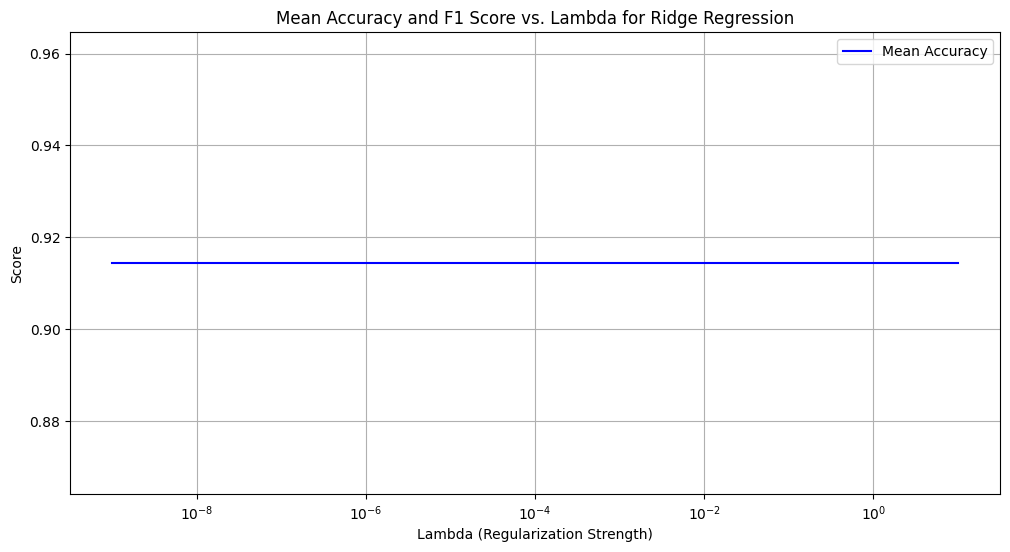

In [83]:
mean_accuracies = []
mean_f1_scores = []
lambdas = np.logspace(-9, 1, 100)


for lambda_ridge in lambdas:
    # Perform stratified k-fold cross-validation
    fold_metrics, best_w, best_accuracy, best_f1_score, mean_val_accuracy, mean_val_f1_score, mean_train_accuracy, mean_train_f1_score = stratified_k_fold_cross_validation(
        y = y_train, 
        tx = x_train, 
        k_folds = k_folds, 
        max_iters = max_iters, 
        gamma = gamma, 
        lambda_ridge = 0.1, 
        optimization_method = "ridge"
        )
    
    mean_accuracies.append(mean_val_accuracy)
    mean_f1_scores.append(mean_val_f1_score)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(lambdas, mean_accuracies, label='Mean Accuracy', color='blue')
#plt.plot(lambdas, mean_f1_scores, label='Mean F1 Score', color='orange')

plt.xscale('log')  # Log scale for lambda
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Score')
plt.title('Mean Accuracy and F1 Score vs. Lambda for Ridge Regression')
plt.legend()
plt.grid()
plt.show()

array([[ 0.16632282,  0.06161856],
       [-0.80759004, -0.14923779],
       [ 0.02728606,  0.17440413],
       ...,
       [ 0.15372545,  0.2517041 ],
       [ 0.23191809, -0.15248983],
       [ 0.20013794, -0.01934327]])

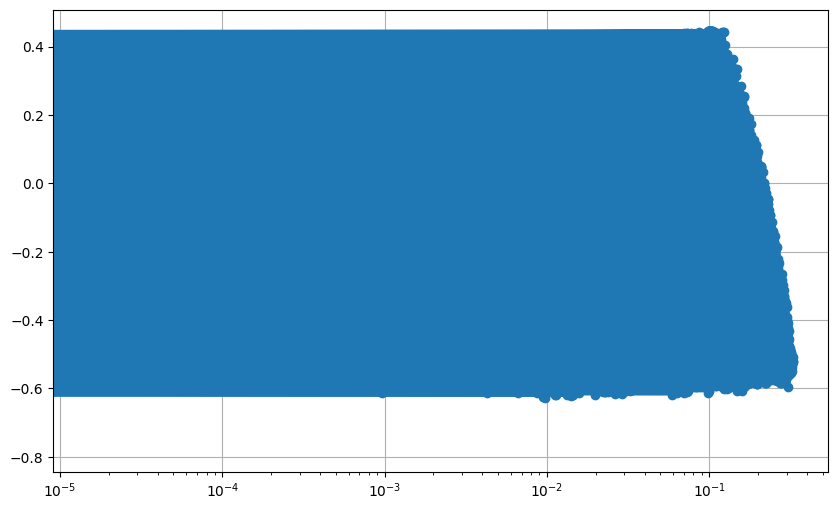

In [30]:
x_pca = pca(x_train, variance_threshold=1)
x_pca = x_pca[:,:2]
display(x_pca)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(x_pca[:,0], x_pca[:,1], marker='o')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.grid()
plt.show()

In [70]:
print(y_train.dtype)
print(x_train.dtype)
print(x_train.shape)



int64
object
(328135, 181)
